## Imports

In [144]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Parameters

In [18]:
# label/sheet name : total_row_switch, row offset
output_dict = {
    "Demand": [True, 0, 0],
    "Production": [True, 0, 0],
    "Price": [False, 0, 0],
    "LNG": [True, 8, [0, 1, 2]],
    "Piped Imports": [True, 12, [0, 1, 2]],
    "Connections": [False, 12, [0, 1, 2]],
    "Supply Mix": [False, 10, [0, 1]]
}

output_df_dict = {}

In [101]:
countries_dict = {
    "Deutschland" : "Germany",
    "Niederlande" : "Netherlands",
    "Frankreich" : "France",
    "Schweiz" : "Switzerland"
}

In [104]:
pd.DataFrame.from_dict(
        countries_dict,
        orient = "index",
        columns = ["c_name"]
    )

,c_name
Deutschland,Germany
Niederlande,Netherlands
Frankreich,France
Schweiz,Switzerland


## Data from Excel

In [105]:
for output_metric, output_params in output_dict.items():
    output_df_dict[output_metric] = pd.read_excel(
        io = "../gasmarketmodel/data/outputs/Master.xlsx",
        sheet_name = output_metric,
        skiprows = 4 + output_params[1],
        index_col = output_params[2]
    )
    # Drop Total row
    if output_params[0]:
        output_df_dict[output_metric].drop("Total", inplace = True)

/home/flo/.pyenv/versions/3.8.6/envs/gasmarketmodel/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


## Map Data

### Blank

In [141]:
country_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).explode().merge(
    pd.DataFrame.from_dict(
        countries_dict,
        orient = "index",
        columns = ["c_name"]
    ).reset_index(),
    left_on = "name",
    right_on = "c_name",
)[["index", "geometry"]].set_index("index")
country_map["area"] = country_map["geometry"].area
country_map = country_map.sort_values("area", ascending = False).groupby("index").first()
country_map["labelpoint"] = country_map["geometry"].apply(lambda x: x.representative_point().coords[:][0])
country_map

/tmp/ipykernel_6116/1956287209.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  country_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).explode().merge(
/tmp/ipykernel_6116/1956287209.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  country_map["area"] = country_map["geometry"].area


,geometry,area,labelpoint
index,,,
Deutschland,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",45.923594,"(10.432351054415541, 51.43122793233069)"
Frankreich,"POLYGON ((6.18632 49.46380, 6.65823 49.20196, ...",64.627290,"(2.099228142939435, 46.895070705750044)"
Niederlande,"POLYGON ((6.90514 53.48216, 7.09205 53.14404, ...",5.264180,"(5.398113217342898, 52.04023468689047)"
Schweiz,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...",5.440201,"(8.28651553630333, 46.80966248227965)"


### Demand

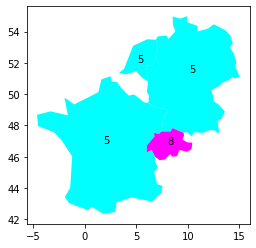

In [149]:
demand_map = country_map.merge(
    output_df_dict["Demand"],
    left_index = True,
    right_index = True
)
demand_map.plot(
    column = "Aug-21",
    cmap = "cool"
)
for idx, row in demand_map.iterrows():
    plt.annotate(text = row["Aug-21"],
                 xy = row["labelpoint"],
                 horizontalalignment = "center"
                )

### Prices

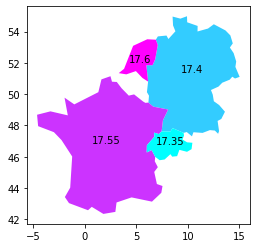

In [148]:
price_map = country_map.merge(
    output_df_dict["Price"],
    left_index = True,
    right_index = True
)
price_map.plot(
    column = "Aug-21",
    cmap = "cool"
)
for idx, row in price_map.iterrows():
    plt.annotate(text = round(row["Aug-21"],2),
                 xy = row["labelpoint"],
                 horizontalalignment = "center"
                )

In [65]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
list(world[world["name"] == "France"].geometry.values[0])

/tmp/ipykernel_6116/652287095.py:2: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  list(world[world["name"] == "France"].geometry.values[0])
/tmp/ipykernel_6116/652287095.py:2: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  list(world[world["name"] == "France"].geometry.values[0])
